In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("HR Data - Capstone Project - Distributions.csv")

In [35]:
df.head()

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8


In [36]:
df.head(10)

,EmployeeId,Hrs,Rating,EmployeeSatisfaction
0,E01,12.118051,Excellent,6
1,E02,13.298281,Excellent,8
2,E03,13.276334,Excellent,7
3,E04,10.798173,Excellent,9
4,E05,11.579172,Excellent,8
5,E06,13.835646,Outstanding,7
6,E07,13.673691,Outstanding,7
7,E08,8.031467,Unsatisfactory,6
8,E09,9.304839,Excellent,7
9,E10,13.429567,Excellent,6


In [37]:
#How many observations are there in the dataset?
# 0 will show number of rows and 1 will show columns:
df.shape

(500, 4)

In [38]:
#How many variables have missing values?
df.isnull().sum()

EmployeeId              0
Hrs                     8
Rating                  0
EmployeeSatisfaction    0
dtype: int64

In [39]:
#What is the average value for the Hrs variable? Round it off to 2 decimal places.
df['Hrs'].mean()

11.309992252833334

In [40]:
#What is the cardinality of the Rating variable in the dataset?
df.nunique()

EmployeeId              500
Hrs                     492
Rating                    6
EmployeeSatisfaction      4
dtype: int64

In [41]:
#Calculate the mode of the employee performance in the rating column
df['Rating'].mode()

0    Excellent
Name: Rating, dtype: object

In [42]:
df['Rating'] = df['Rating'].replace({'Un satisfactory': 'Unsatisfactory', 'satisfactory': 'Satisfactory'})

In [43]:
#Calculate the range of hours the employee is working for in case of unsatisfactory rating.
unsatisfactory_data = df[df['Rating'] == 'Unsatisfactory']
min_hrs = unsatisfactory_data['Hrs'].min()
max_hrs = unsatisfactory_data['Hrs'].max()

print("Min_hrs:",min_hrs)
print("Max_hrs:",max_hrs)

# Calculate the range
hours_range = max_hrs - min_hrs

print("Range:",hours_range)

Min_hrs: 0.091720323
Max_hrs: 8.489765491
Range: 8.398045168


In [56]:
df.describe()

,Hrs,EmployeeSatisfaction
count,492.000000,500.000000
mean,11.309992,7.240000
std,5.266512,1.006193
min,0.091720,6.000000
25%,9.711867,6.000000
50%,11.204755,7.000000
75%,12.617792,8.000000
max,120.398464,9.000000


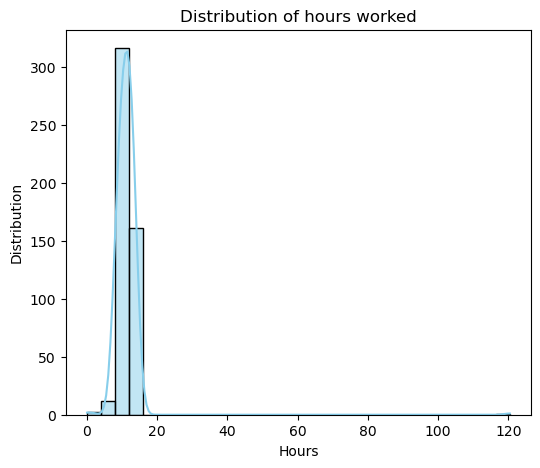

In [44]:
#Here's how you can create a histogram and a boxplot to visualize the distribution of the 'Hrs' variable and identify outliers

import matplotlib.pyplot as plt
import seaborn as sns

#plotting histogram

plt.figure(figsize=(6,5))
sns.histplot(df["Hrs"],bins=30,kde = "True" , color = "skyblue")
plt.title("Distribution of hours worked")
plt.xlabel("Hours")
plt.ylabel("Distribution")
plt.show()


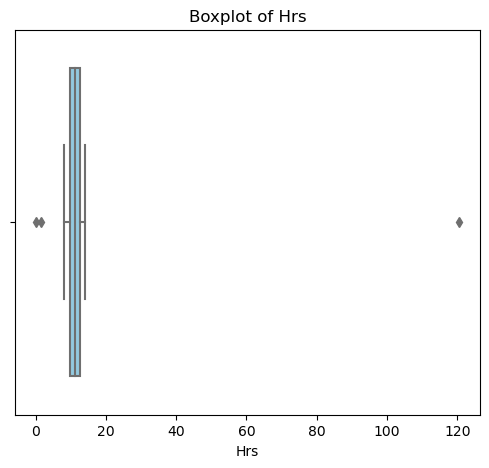

In [45]:
#plotting boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x=df['Hrs'] , color = "skyblue")
plt.title('Boxplot of Hrs')
plt.xlabel('Hrs')
plt.show()


#charts shows outlier on both the side

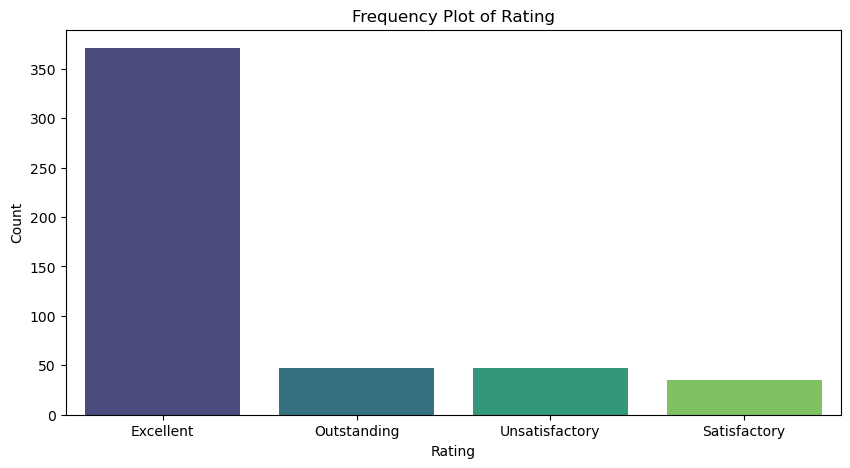

In [46]:
#Creat a frequency plot of rating
plt.figure(figsize=(10,5))
sns.countplot(x="Rating", data=df , palette = "viridis")
plt.title('Frequency Plot of Rating')
plt.ylabel('Count')
plt.xlabel("Rating")
plt.show()

In [47]:

#Also, we can see that the majority of employees are giving 6 or 7 satisfaction scores which means that the majority of employees aren’t that happy due to lower work life balance. 
#Therefore, our major focus should be towards increasing the work life balance of the employees rather than rewarding the higher number of work hours from the employees.

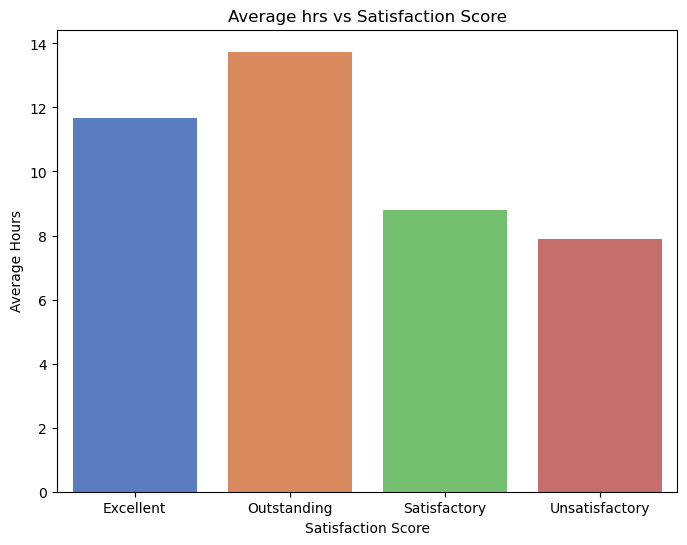

In [48]:
#calculate the average number of hours an employee is dedicating with respect to their satisfaction score and see if you can confirm the work life balance theory by this analysis.

# Bivariate analysis: Average number of hours vs Satisfaction score
average_hours_by_rating = df.groupby('Rating')['Hrs'].mean().reset_index()

#Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Rating',y='Hrs',data=average_hours_by_rating,palette = "muted")
plt.title('Average hrs vs Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Average Hours')
plt.show()




In [49]:
#Which rating has the highest number of average working hours?

#mean hours for each rating 
average_hours_by_Rating = df.groupby('Rating')['Hrs'].mean().sort_values(ascending= False)

print(average_hours_by_Rating)

Rating
Outstanding       13.739970
Excellent         11.664907
Satisfactory       8.786688
Unsatisfactory     7.895444
Name: Hrs, dtype: float64


In [50]:
#Identify the correct upper and lower cut off within Hrs using IQR rule to exclude the outliers
import numpy as np

#calculate the first quartile(Q1) and third quartile(Q3)
Q1 = df['Hrs'].quantile(0.25)
Q3 = df['Hrs'].quantile(0.75)

#calculate the Interquantile Range(IQR)
IQR = Q3 - Q1

#Define lower and upper cutoff
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

#Round of 2 decimal places 
lower_cutoff = round(lower_cutoff,2)
upper_cutoff = round(upper_cutoff,2)

print(f'Lower Cutoff :{lower_cutoff} , Upper Cutoff:{upper_cutoff}')

Lower Cutoff :5.35 , Upper Cutoff:16.98


In [51]:
# Filter the DataFrame to exclude outliers
filtered_df = df[(df['Hrs'] >= lower_cutoff) & (df['Hrs'] <= upper_cutoff)]

# Calculate the mean value after treatment
mean_after_treatment = filtered_df['Hrs'].mean()

# Display the result
print(f'Mean value after treating outliers: {mean_after_treatment}')

Mean value after treating outliers: 11.130160642118609


In [52]:
#To identify the probabilities for each rating within the "Rating" variable

rating_probabilities = df['Rating'].value_counts(normalize = True)*100

print("Rating_probabilities")
print(rating_probabilities)

Rating_probabilities
Excellent         74.2
Outstanding        9.4
Unsatisfactory     9.4
Satisfactory       7.0
Name: Rating, dtype: float64


In [54]:
#Please calculate the probability that 2 out of a sample of 10 employees are rated as outstanding. Round it off to 2 decimal places. 

# Probability of getting an outstanding rating
p_outstanding = rating_probabilities['Outstanding'] / 100

from scipy.special import comb

#Binomial Distribution 

n_trials = 10
k_success = 2

#Binomial Coeffecient 
binomial_coeffecient = comb(n_trials,k_success)

#Binomial Probability
binomial_probability = binomial_coeffecient * (p_outstanding ** k_success) * ((1 - p_outstanding)**(n_trials - k_success))

Binomial_probability_round = round(binomial_probability,2)

print("Binomial Distribution is:",Binomial_probability_round)

Binomial Distribution is: 0.18


In [32]:
#calculate the probability that at least 3 out of a sample of 10 employees are rated as outstanding. Round it off to 2 decimal places.
from scipy.stats import binom

#at least 3 samples out of 10 using the binomial probability mass function (PMF) for this calculation

n_trials2 = 10
k_atleast = 3

#probability of at least 3 outstanding ratings
probability_of_rating3 = 1 - binom.cdf(k_atleast - 1,n_trials2,p_outstanding)

Probability_round=round(probability_of_rating3,2)

print("Probability that at least 3 out of sample of 10 employees is :",Probability_round)

Probability that at least 3 out of sample of 10 employees is : 0.06


In [55]:
#at least 7 out of a sample of 10 employees are rated as outstanding or Excellent

p_excellent = rating_probabilities['Excellent'] / 100

n_trials3 = 10
k_atleast = 7

#Calculate distribution using binomial distribution 
probability_outstanding = 1 - binom.cdf(k_atleast - 1,n_trials3,p_outstanding)
probability_excellent = 1 - binom.cdf(k_atleast - 1,n_trials3,p_excellent)

#Add up the probability of both the ratings]

probability_rating7 = probability_outstanding + probability_excellent

probability_round2 = round(probability_rating7,2)
print(probability_round2)


0.76


In [30]:
#calculate the probability that None of the trainees are rated as Unsatisfactory

n_trainees = 10
p_unsatisfactory = rating_probabilities['Unsatisfactory'] / 100

#probability using the complement rule

probability_none_unsatisfactory = (1-p_unsatisfactory) ** n_trainees

probability_none_unsatisfactory_round = round(probability_none_unsatisfactory,2)

print("Probability that None of the trainees are rated as Unsatisfactory:",probability_none_unsatisfactory_round)

Probability that None of the trainees are rated as Unsatisfactory: 0.37


In [29]:
from scipy.stats import norm

# what’s the probability that an employee will provide less than 9 hrs of service?
mean_hrs = 11.30
std_dev_hrs = 5.26

x = 9

# Calculate the probability using the normal distribution CDF
probability_less_than_9_hrs = norm.cdf(x, loc=mean_hrs, scale=std_dev_hrs)

print(probability_less_than_9_hrs)

0.33096054563600164
